<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/tensor_flow_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# introductin to regression with neurl networks in tensorflow

there are many diefineitoin f a regression problmen but in our case were goitn to simplify it: predicting a numerical varialbe based on some outehr cominatin of variables even shorter .. predicitng a number

In [2]:
tf.__version__

'2.17.1'

## creatdata toview and fit

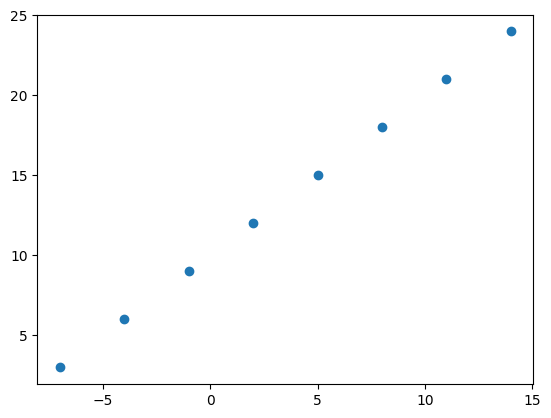

In [3]:
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create lables
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# visulaize it
plt.scatter(X,y)

In [4]:
y == (X + 10)
''' this is the relationship i want my model to fingure it out  '''

' this is the relationship i want my model to fingure it out  '

## INput and output shapes

In [5]:
X.shape, y.shape

((8,), (8,))

In [6]:
# create a demo tensor for our housign price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0],y[0]

(-7.0, 3.0)

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(-7.0, 3.0)

In [11]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

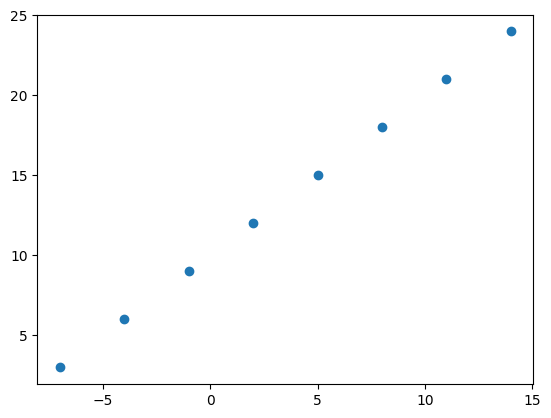

In [14]:
plt.scatter(X,y)

## stps in modelling with tensorflow

1. create  model - define the input and output layes , as well as the hidden layers of a deep learnign model
2. compile a model - define the loss function , and optimzer and also the evaluation metrics ( what w e can use to interpret the performnace of our model).
3. fittign a model - letting the model to try to find y given X

In [15]:
# set the radnom seed
tf.random.set_seed(42)
# create a model using the sequenctial api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)# the output of this layer is one
])
# compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics = ['mae'])
# fit the model
# let first expand the dimension for our model
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.3929 - mae: 13.3929
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 13.2604 - mae: 13.2604
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 13.1279 - mae: 13.1279
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.9954 - mae: 12.9954
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.8629 - mae: 12.8629
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.7304 - mae: 12.7304
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.5979 - mae: 12.5979
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.4654 - mae: 12.4654
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.3329 - mae: 12.3329
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.2004 - mae: 12.2004
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 12.0679 - mae: 12.0679
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.9354 - mae: 11.9354
Epoch 13/100
1/1 ━━━━━━━━━━

In [16]:
# check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# try and make a prediction using our model
model.predict([tf.expand_dims(tf.constant([17.0]),axis = -1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[29.950132]], dtype=float32)

## imporve our model
we can imporve our model , by altering the steps we took to create a model

1. **creating a model** - hrer we might add more layesr, increase the num ber o hidden untis , within each of the hidden layes, change the activation function of each layer
2. **computing a model** - here we might change the optimizatin function or perhaps the **learing rate** of the optimzation function.
3. **fitting a model** - here we might fit a mode for more epochs


In [18]:
# let me write a more imporved model
model = tf.keras.Sequential([
       tf.keras.layers.Dense(64, activation='linear'),
       tf.keras.layers.Dropout(0.2),  # Example of dropout
       tf.keras.layers.Dense(32, activation='linear'),
       tf.keras.layers.Dense(1, activation='linear')  # Output layer
   ])
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),metrics = ['mae'])

lets break down our model
the first hidden layer is a dnsely connected layer. this measn each neuron in this layer recives inputs from all the neurons in the previous layer( which is the input layer in this case).
it has 63 neurons(or units) the higher the number of neurons , teh more complex patterns thelayer can learn.
it uses the ReLU (rectified Linear unit) activation function . Relu introduces non-linearity into the model . it outpus the input directly if it is poistive


`tf.keras.layers.Dropout(0.2)`:
this is a dropout layer used for regularizaion. it helps prevent overfitting( where the model performs well on training ata but poorly on unseen data).
during training , it randomly sets 20% (o.2) of the inptu units to 0 at each update during graingin time, which helps prevent overrelienc on any single neuron and encorage the network to learn more robust features.



In [19]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
X = tf.constant(X,dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5560 - mae: 12.5560
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 60.8778 - mae: 60.8778
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.1052 - mae: 9.1052
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.5445 - mae: 18.5445
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.5631 - mae: 10.5631
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.3810 - mae: 9.3810
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.0448 - mae: 11.0448
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.5798 - mae: 7.5798
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5225 - mae: 10.5225
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.2810 - mae: 9.2810
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.5498 - mae: 5.5498
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.3437 - mae: 4.3437
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [20]:
model.predict(tf.expand_dims(tf.constant([-23.0]),axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[-19.444952]], dtype=float32)

## Evaluatng a model

in practice, a typical workflowyoull go through when  building a neural netwrorks is:
```
build a model -> fit it -> evaluat it -> tweak a model -> fit it -> evaluate it ..
```

In [21]:
from tensorflow.keras.utils import plot_model

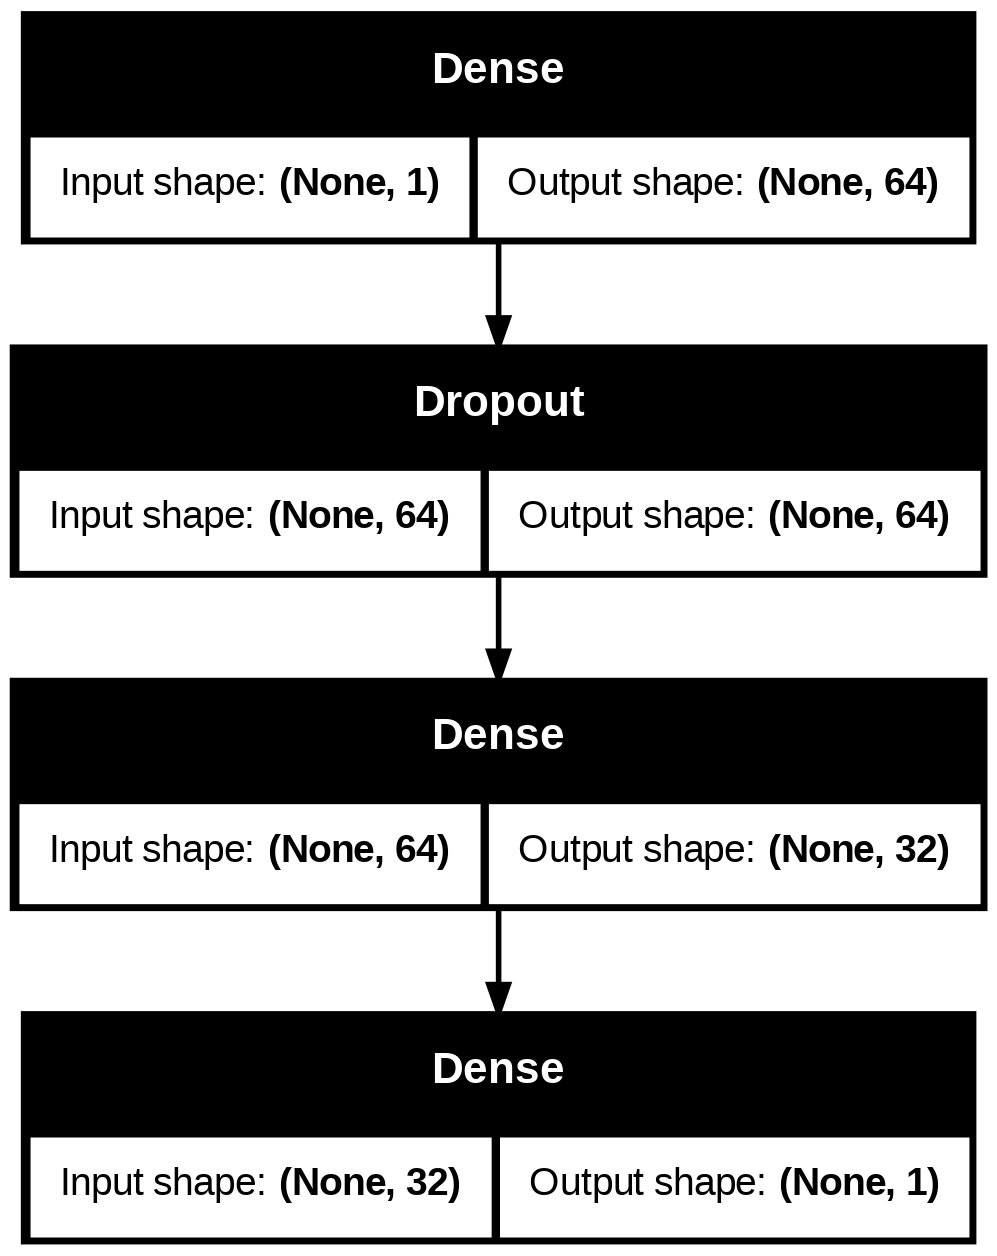

In [22]:
plot_model(model,show_shapes = True)

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [24]:
# lets create a plotting function
def plot_predictions(train_data = X , train_labels = y, predictions = model.predict(X)):
  ''' plot training data and predictions '''
  plt.figure(figsize = (10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label='training data')
  # plot training data in green
  plt.scatter(train_data,predictions,c='g',label='predictions')
  # show the legend

  plt.legend()
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


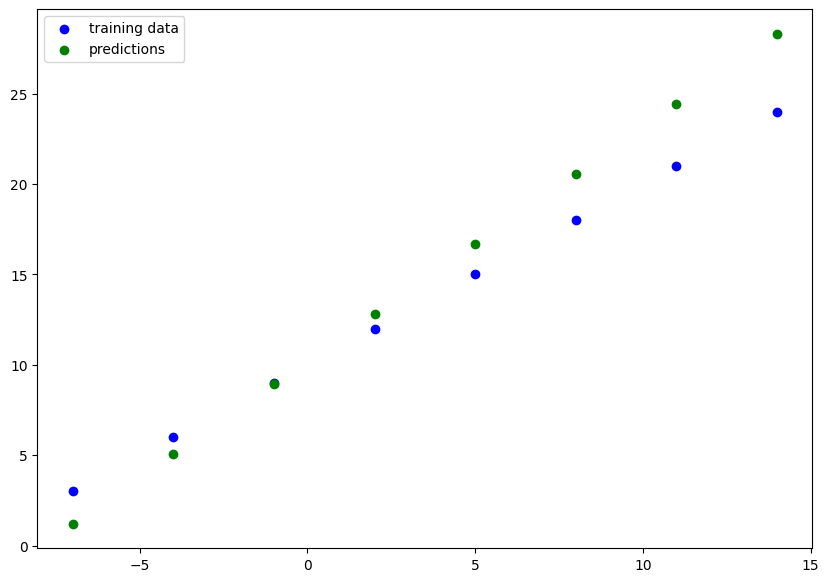

In [25]:
plot_predictions()

### saving our model
saving our models allows us to use them outside of google colab or wherever they were trained


there are two main format
1. saemodel format
2. the HDF5 format

In [26]:
# save a model useing savemodel format
import pathlib
model_path = pathlib.Path('model.keras')
model.save(model_path)

In [27]:
model.save('model.h5')

In [28]:
## loading our models
loaded_model = tf.keras.models.load_model('model.keras')


In [29]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [30]:
loaded_model.predict(tf.expand_dims(tf.constant([-23.0]),axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[-19.444952]], dtype=float32)

In [31]:
loaded_model_2 = tf.keras.models.load_model('model.h5')

In [32]:
loaded_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,243 (8.77 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [33]:
from typing import Any, Optional, List, Dict, Tuple
from google.colab import files
import io
from pathlib import Path
import os

def download_files(file_paths:Optional[List[Path]]=None,all_files:bool = False):
  try:
    downlod_files = list(file_paths)
  except:
    pass
  if all_files:
    downlod_files = list(os.listdir())
  for file in downlod_files:
    files.download(file)
  else:
    try:
      for path in file_paths:
        files.download(path)
    except:
      print('something went wrong')
      return None
    return None
  return None




In [34]:
download_files(all_files=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

something went wrong


In [35]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

|### larger example

In [36]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [37]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
insurance.size

9366

In [39]:
insurance.shape

(1338, 7)

In [40]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [41]:
columns = insurance.columns

In [42]:
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
insurance_one_hot = pd.get_dummies(insurance)

In [44]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


to prepare our data, we can borrow a few classes from scikit_learn

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [57]:
# create a column tranformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),# turns all thse values in thse columns to values 0 and 1
    (OneHotEncoder(handle_unknown = 'ignore'),['sex','smoker','region'])
)

# create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']
# build our train and est sets
# fit the column transformer to our training data
# build our train and est sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)

# transform trainging and test data with normilazation and one hotecoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [58]:
# what does our data look like now?
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [59]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [60]:
X_train_normal.shape

(1070, 11)

our data has been neromalized and one hot encoded . now lets build a neural network model and fit it to our model

In [61]:
tf.random.set_seed(42)
# create the model
# let me write a more imporved model
model_insurance  = tf.keras.Sequential([
       tf.keras.layers.Dense(64, activation='linear'),
       tf.keras.layers.Dropout(0.2),  # Example of dropout
       tf.keras.layers.Dense(32, activation='linear'),
       tf.keras.layers.Dense(1, activation='linear')  # Output layer
   ])
model_insurance.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),metrics = ['mae'])


In [62]:
# Fit the model
history = model_insurance.fit(X_train_normal,y_train,epochs = 100,verbose = 0)


In [63]:
model_insurance.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3510.6875 - mae: 3510.6875  


[3452.755615234375, 3452.755615234375]

Text(0.5, 0, 'epochs')

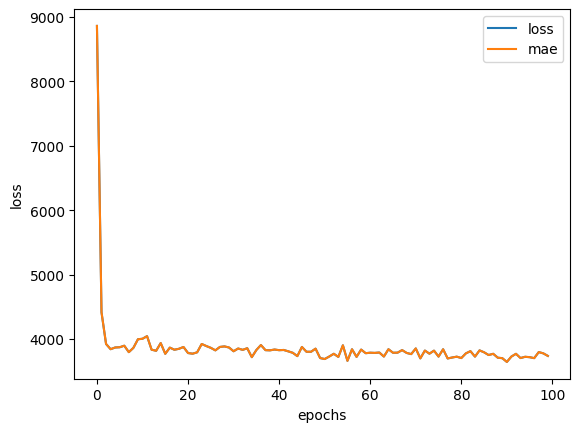

In [64]:
# plot the loss graph fromhistory
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

teh model has a reduction of error of about 30% which is just a change of normalizaion

In [67]:
# lets save the model in both ways
# save the weights
pathlib.Path('model_weights').mkdir(exist_ok=True)
model_insurance.save_weights("model_weights/.weights.h5")
# save the whole model
model_insurance.save(".model.h5")

In [68]:
download_files(all_files=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

something went wrong
